In [1]:
from lsh import *
from utils import *
from query import *

%load_ext autoreload
%autoreload 2

In [2]:
PATH_IMGS     = "imnet-val/val/"
FILE_FEATURES = "imnet-val/cnn-50000.p"
FNAME_OFFSET  = 48 #prefix of stored file names to chop off
IMSIZE        = (224, 224)

data = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)
N_data = data.X.shape[1]

PATH_IMGS     = "imnet-test-1000/imgs/"
FILE_FEATURES = "imnet-test-1000/cnn-1000.p"
FNAME_OFFSET  = 23 #prefix of stored file names to chop off
IMSIZE        = (224, 224)
queries = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)

# Vary all

In [53]:
N_queries = 50

Ls = [0, 1, 2, 4, 8, 16, 32] #number of neighbors to make candidates
bs = [200] #hash bits
es = [10, 6, 3.8, 2.9, 2.7, 2.4, 2.2] #error tolerance

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 50
Ls, [0, 1, 2, 4, 8, 16, 32]
bs, [200]
es, [10, 6, 3.8, 2.9, 2.7, 2.4, 2.2]
Ms, [5, 9, 19, 32, 37, 48, 59]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndcg
     0,      0,      0,   200,  10.0,     5,     0,    0.351,    0.426
     0,      0,      1,   200,  10.0,     5,     1,    0.422,    0.729
     0,      0,      2,   200,  10.0,     5,     2,    0.994,    0.769
     0,      0,      3,   200,  10.0,     5,     4,    0.628,    0.804
     0,      0,      4,   200,  10.0,     5,     8,    1.976,    0.842
     0,      0,      5,   200,  10.0,     5,    16,    2.063,    0.869
     0,      0,      6,   200,  10.0,     5,    32,    2.421,    0.896
     0,      1,      0,   200,   6.0,     9,     0,    0.960,    0.631
     0,      1,      1,   200,   6.0,     9,     1,    1.268,    0.780
     0,      1,      2,   200,   6.0,     9,     2,    1.339,    0.810
     0,      1,      3,   200,   6.0,     9,     4,    1.261,    0.844
     0,      

Optimal points
  b,   e,  M,  L,    t,  ndcg
200, 2.4, 48,  0, 1.61, 0.831
200, 2.4, 48,  1, 1.70, 0.892
200, 2.4, 48,  2, 1.93, 0.911
200, 2.4, 48,  4, 2.58, 0.932
200, 2.4, 48,  6, 3.01, 0.942
200, 2.4, 48,  8, 3.50, 0.950
200, 2.4, 48, 10, 4.01, 0.955
200, 2.4, 48, 13, 4.75, 0.961
200, 2.4, 48, 16, 5.60, 0.965
200, 2.4, 48, 20, 6.55, 0.969
200, 2.4, 48, 24, 7.35, 0.973
200, 2.4, 48, 28, 8.53, 0.976
200, 2.4, 48, 34, 9.70, 0.979
200, 2.4, 48, 40,11.38, 0.982
200, 2.4, 48, 50,13.89, 0.985


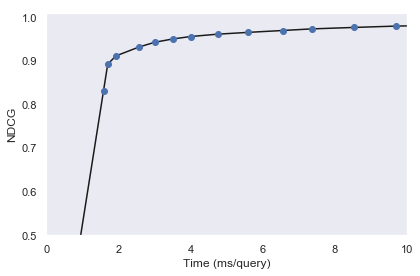

In [89]:
# axlims = [0, 40, 0.5, 1.01]
axlims = [0, 10, 0.5, 1.01]
idxs = plot_search(results, N_data, N_queries, axlims)

# Vary b

In [19]:
N_queries = 10

bs = range(5, 250, 20)
es = [4, 2] #error tolerance
Ls = [1, 6] #number of neighbors to make candidates

results_b = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 10
Ls, [1, 6]
bs, range(5, 250, 20)
es, [4, 2]
Ms, [17, 74]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,     5,   4.0,    17,     1,    0.571,    0.704
     0,      0,      1,     5,   4.0,    17,     6,    0.782,    0.781
     0,      1,      0,     5,   2.0,    74,     1,    1.939,    0.757
     0,      1,      1,     5,   2.0,    74,     6,    3.916,    0.821
     1,      0,      0,    25,   4.0,    17,     1,    0.566,    0.747
     1,      0,      1,    25,   4.0,    17,     6,    0.825,    0.816
     1,      1,      0,    25,   2.0,    74,     1,    3.778,    0.820
     1,      1,      1,    25,   2.0,    74,     6,    3.685,    0.907
     2,      0,      0,    45,   4.0,    17,     1,    1.176,    0.799
     2,      0,      1,    45,   4.0,    17,     6,    0.825,    0.867
     2,      1,      0,    45,   2.0,    74,     1,    1.986,    0.882
     2,      1,      1,    45,   2.0,    74,     6,    3.979, 

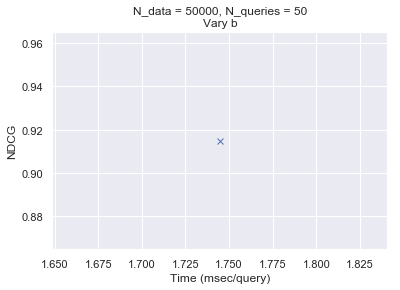

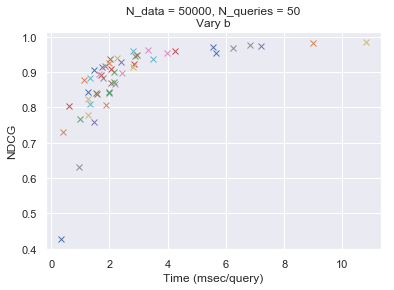

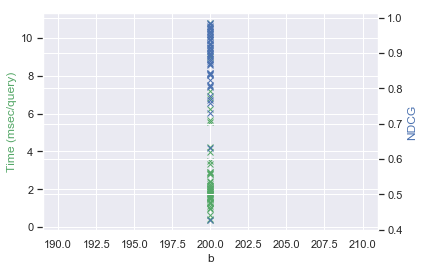

In [55]:
plot_param_search(results_b, 0, N_data, N_queries)

# Vary eps

In [106]:
N_queries = 300

bs = [200]
# es = [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5]
es = [7, 5.5, 4.6, 3.9, 3.6, 3.2, 2.9, 2.7, 2.5, 2.3, 2.1, 1.8] #error tolerance
Ls = [10] #number of neighbors to make candidates

results_eps = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 300
Ls, [10]
bs, [200]
es, [7, 5.5, 4.6, 3.9, 3.6, 3.2, 2.9, 2.7, 2.5, 2.3, 2.1, 1.8]
Ms, [8, 11, 14, 18, 21, 26, 32, 37, 44, 53, 66, 95]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L,   t (ms),     ndcg
     0,      0,      0,   200,   7.0,     8,    10,    0.668,    0.864
     0,      1,      0,   200,   5.5,    11,    10,    0.814,    0.887
     0,      2,      0,   200,   4.6,    14,    10,    0.976,    0.897
     0,      3,      0,   200,   3.9,    18,    10,    1.606,    0.910
     0,      4,      0,   200,   3.6,    21,    10,    1.642,    0.918
     0,      5,      0,   200,   3.2,    26,    10,    1.771,    0.929
     0,      6,      0,   200,   2.9,    32,    10,    2.879,    0.942
     0,      7,      0,   200,   2.7,    37,    10,    3.421,    0.942
     0,      8,      0,   200,   2.5,    44,    10,    3.050,    0.950
     0,      9,      0,   200,   2.3,    53,    10,    3.625,    0.959
     0,     10,      0,   200,   2.1,    66,    10,    

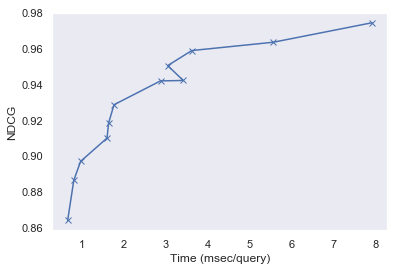

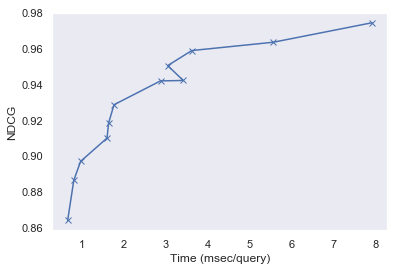

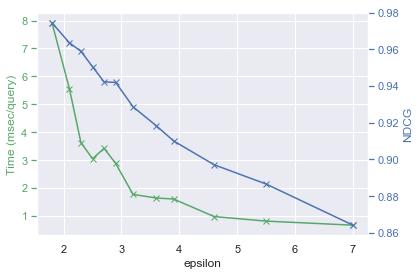

In [107]:
plot_param_search(results_eps, 1, N_data, N_queries)

# Vary L

In [104]:
N_queries = 300

bs = [200]
es = [2.7] #error tolerance
Ls = [0, 1, 2, 4, 6, 8, 10, 13, 16, 20, 24, 28, 34, 40, 50, 60] #number of neighbors to make candidates

results_L = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 300
Ls, [0, 1, 2, 4, 6, 8, 10, 13, 16, 20, 24, 28, 34, 40, 50, 60]
bs, [200]
es, [2.7]
Ms, [37]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L,   t (ms),     ndcg
     0,      0,      0,   200,   2.7,    37,     0,    1.258,    0.808
     0,      0,      1,   200,   2.7,    37,     1,    1.172,    0.874
     0,      0,      2,   200,   2.7,    37,     2,    1.314,    0.899
     0,      0,      3,   200,   2.7,    37,     4,    1.712,    0.920
     0,      0,      4,   200,   2.7,    37,     6,    2.237,    0.931
     0,      0,      5,   200,   2.7,    37,     8,    2.655,    0.938
     0,      0,      6,   200,   2.7,    37,    10,    3.005,    0.944
     0,      0,      7,   200,   2.7,    37,    13,    3.492,    0.952
     0,      0,      8,   200,   2.7,    37,    16,    3.972,    0.957
     0,      0,      9,   200,   2.7,    37,    20,    4.716,    0.961
     0,      0,     10,   200,   2.7,    37,    24,    5.376,    0.966
     0,      0,     11,   

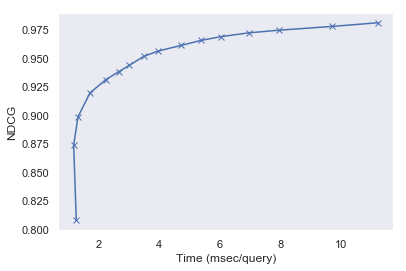

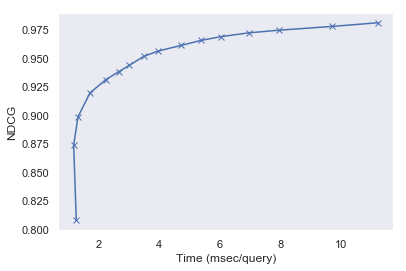

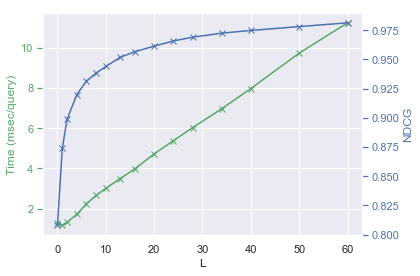

In [105]:
plot_param_search(results_L, 2, N_data, N_queries)